### CSV Parser for Eye Time Based Data

The objective of this script is to take a CSV file consisting of eye tracking data and return a metric for the average "processing fluency" of the conducted test. The eye tracking data contained in the file has the following structure: [X Screen Position of Eye Focus, Y Screen Position of Eye Focus, Milliseconds since the beginning of the test]. The processing fluency metric will be derived for each in-order pair of data points by dividing the time (ms) difference between data points by the Euclidean (straight-line in pixels) distance of the data points. The average of these individual derived values will be taken to obtain the final average processing fluency of the test for that particular participant. 


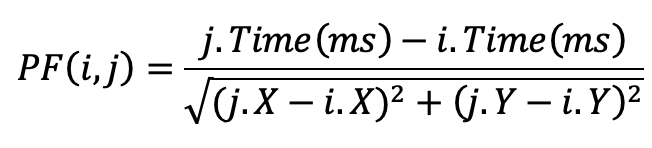

# Fields in CSV: 
* [tester_id, tester_age, tester_gender, item_id, test_id, test_created_at, test_browser_width_px, test_browser_height_px, test_duration_ms, test_raw_data]

In [26]:
import csv
import math
from collections import defaultdict
import pprint


#All other indices are name/sex/etc.
test_data_index = 9
image_id_index = 3
count = 0

Image_PFs_Dict = defaultdict(list)

def Euclidean_Distance(x1, y1, x2, y2):
    diffx = x2-x1
    diffy = y2-y1
    return math.sqrt((diffx**2) + (diffy**2))

def Average_List(lst): 
    return sum(lst) / len(lst)


with open('Pilot_Experiment_Raw_Data.csv', newline='\n') as f:
    
    reader = csv.reader(f)
    
    for row in reader:
        
        #Ignore Header Information
        if count>0:
            
            #row[test_data_index] is a string lol
            stringData = row[test_data_index]
            
            #break up the list of X,Y,time datapoints
            data_points_raw = stringData[2:len(stringData)-2].split('],[')
            dps_parsed = []
            for dp in data_points_raw:
                dps_parsed.append(dp.split(','))
                
            Inverse_PF_data = []
            for index in range(0,len(dps_parsed)-1):
                x1 = float(dps_parsed[index][0])
                y1 = float(dps_parsed[index][1])
                x2 = float(dps_parsed[index+1][0])
                y2 = float(dps_parsed[index+1][1])
              
                #Distance Formula Tested: WORKING CORRECTLY
                dist = Euclidean_Distance(x1, y1, x2, y2)
                
                time1 = int(dps_parsed[index][2])
                time2 = int(dps_parsed[index+1][2])
                
                timeDiff = time2 - time1

                #We calculate the inverse PF to avoid the divide by zero problem when dist = 0
                Inverse_PF= dist/timeDiff
                
                Inverse_PF_data.append(Inverse_PF)
            
            if(len(Inverse_PF_data)>0):
                average = Average_List(Inverse_PF_data)
                PF = 1/average
                Image_PFs_Dict[row[image_id_index]].append(PF)


                
                #print('Average Inverse Processing Fluency for Test: ', average)
                
                #So long as average != 0, or the eye tracking picked up on SOME movement for that image, there shouldn't be a divide by zero problem to obtain actual processing fluency metric
                #print('Average Processing Fluency for Test', PF)

        count+=1
        

Image_AveragePF_Dict = {}
for image_id, PF_list in Image_PFs_Dict.items():
    #print(PF_list)
    Image_AveragePF_Dict[image_id] = Average_List(PF_list)


pp = pprint.PrettyPrinter(indent=4)
pp.pprint(Image_AveragePF_Dict)



{   '00d86ab0-c369-4144-98e2-0e0f3a6fe761': 0.2712627318743662,
    '10c48b53-0789-4b76-8257-dc70ff6cbae9': 0.2480455777952292,
    '114234ac-33c9-4e22-b26f-0f5acf6c04c4': 0.2734218382989481,
    '1b63b1a3-079f-41ce-b94c-cf7ab60d15d6': 0.23387801744655662,
    '2ea7a4bc-e970-4eef-9264-131ab3bfcdd8': 0.27207217633724495,
    '343a1f14-f286-482d-90da-cea7966addd5': 0.2862871965561885,
    '36ba1e18-7ef9-4aaa-9d2c-c6b6f43c76d6': 0.24777664570126617,
    '3894fa9c-88f5-49ce-940c-ff7e6220eb38': 0.2803553385823997,
    '3ad1e5f0-4e36-4b37-8e93-3da5869d7c54': 0.2099804486377685,
    '445452cb-d12b-448b-98c8-2ba9d45036a2': 0.21314240073116278,
    '4a873448-a3c1-4cae-b2df-ac698347ec9f': 0.2328492077635826,
    '4b82af09-fc5a-4fcd-9caa-60620df5f4b8': 0.3141761248271433,
    '64cec8cf-afa2-46b7-bcfa-1c8ed120b1a2': 0.21024231673647648,
    '68a3c6e2-50a2-44f1-b174-dc673fd0037a': 0.24862789415316655,
    '6b6b6b22-0d39-4315-9647-3ddc58f4a3b8': 0.26165101781824074,
    '70ea3a23-68b6-474b-88af-e4d3